In [1]:
# Import required libraries
import matplotlib.pyplot as plt
from mcnpy.cov.parse_covmat import read_njoy_covmat

# Path to GENDF file
gendf = '/home/MONLEON-JUAN/MCNPy/mcnpy/cov/files/260560_80.06.xs.gendf'

In [2]:
# Parse the GENDF file to get CovMat object
covmat = read_njoy_covmat(gendf)
print(f"Number of energy groups: {covmat.num_groups}")
print(f"Number of matrices: {covmat.num_matrices}")

Number of energy groups: 56
Number of matrices: 7


## Explore Available Data

First, let's see what isotopes and reactions are available in the covariance matrix.

In [3]:
# Get available isotopes and reactions
print("Available isotopes:", sorted(covmat.isotopes))
print("\nReactions by isotope:")
reactions_dict = covmat.reactions_by_isotope()
for iso in sorted(reactions_dict.keys()):
    print(f"  ZAID {iso}: MT = {reactions_dict[iso]}")

Available isotopes: [26056]

Reactions by isotope:
  ZAID 26056: MT = [1, 2, 4, 5, 16, 102, 103]


In [4]:
# Plot uncertainties for capture reaction (MT=102)
fig, ax = plt.subplots(figsize=(10, 6))
covmat.plot_uncertainties(zaid=26056, mt=102, ax=ax)
plt.show()

In [5]:
# Plot uncertainties for multiple reactions
fig, ax = plt.subplots(figsize=(10, 6))
covmat.plot_uncertainties(zaid=26056, mt=[2, 102, 103], ax=ax)
plt.show()

## Example 1: Plot Cross-Section Uncertainties

The `plot_uncertainties` method visualizes relative uncertainties as a function of energy.

In [12]:
# Plot cross-sections without uncertainties
fig, ax = plt.subplots(figsize=(10, 6))
covmat.plot_multigroup_xs(zaid=26056, mt=[2, 102], ax=ax, show_uncertainties=False)
plt.show()

In [7]:
# Plot cross-sections WITH 1-sigma uncertainty bands
fig, ax = plt.subplots(figsize=(10, 6))
covmat.plot_multigroup_xs(zaid=26056, mt=102, ax=ax, show_uncertainties=True, sigma=1.0)
plt.show()

## Example 2: Plot Multigroup Cross-Sections

The `plot_multigroup_xs` method shows the actual cross-section values with optional uncertainty bands.

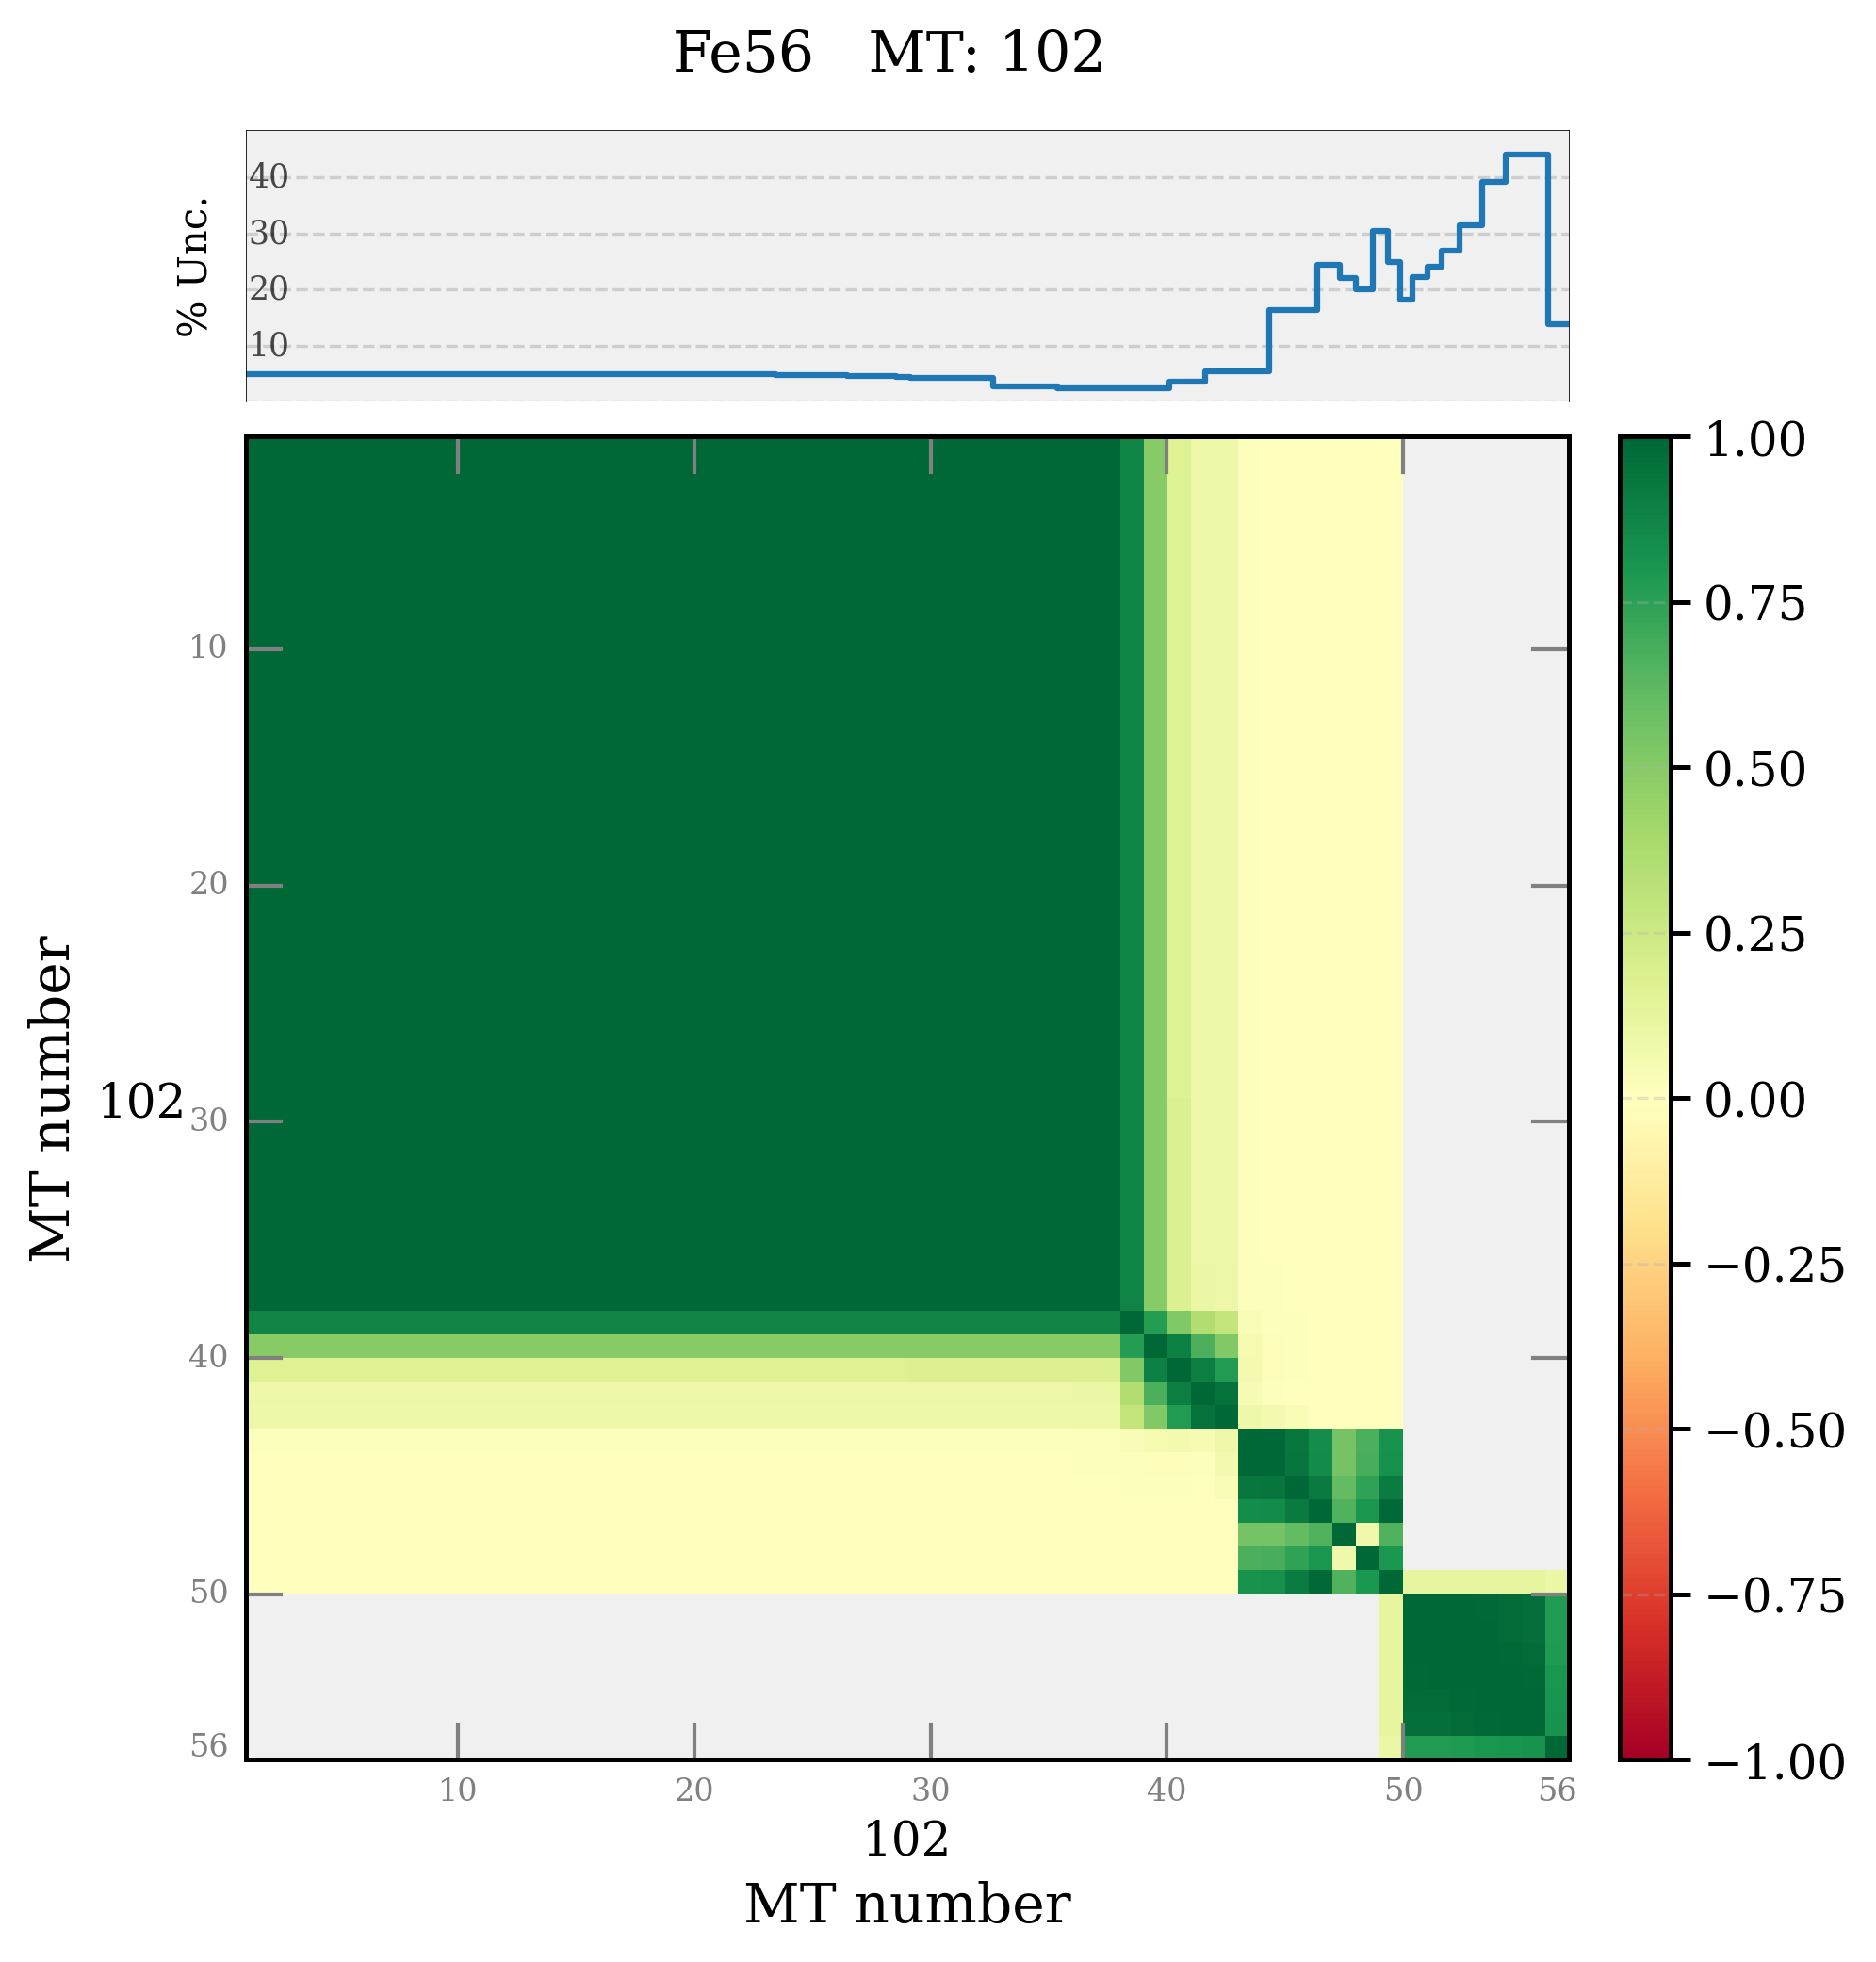

In [8]:
# Heatmap for a single reaction (diagonal block)
covmat.plot_covariance_heatmap(zaid=26056, mt=102, show_uncertainties=True)
plt.show()

## Example 3: Plot Covariance Heatmaps

The `plot_covariance_heatmap` method visualizes the covariance matrix structure. You can plot:
- A single reaction (diagonal block): `mt=102`
- Multiple reactions (multiple diagonal blocks): `mt=[102, 103]`
- Cross-covariance between two reactions: `mt=(102, 103)`

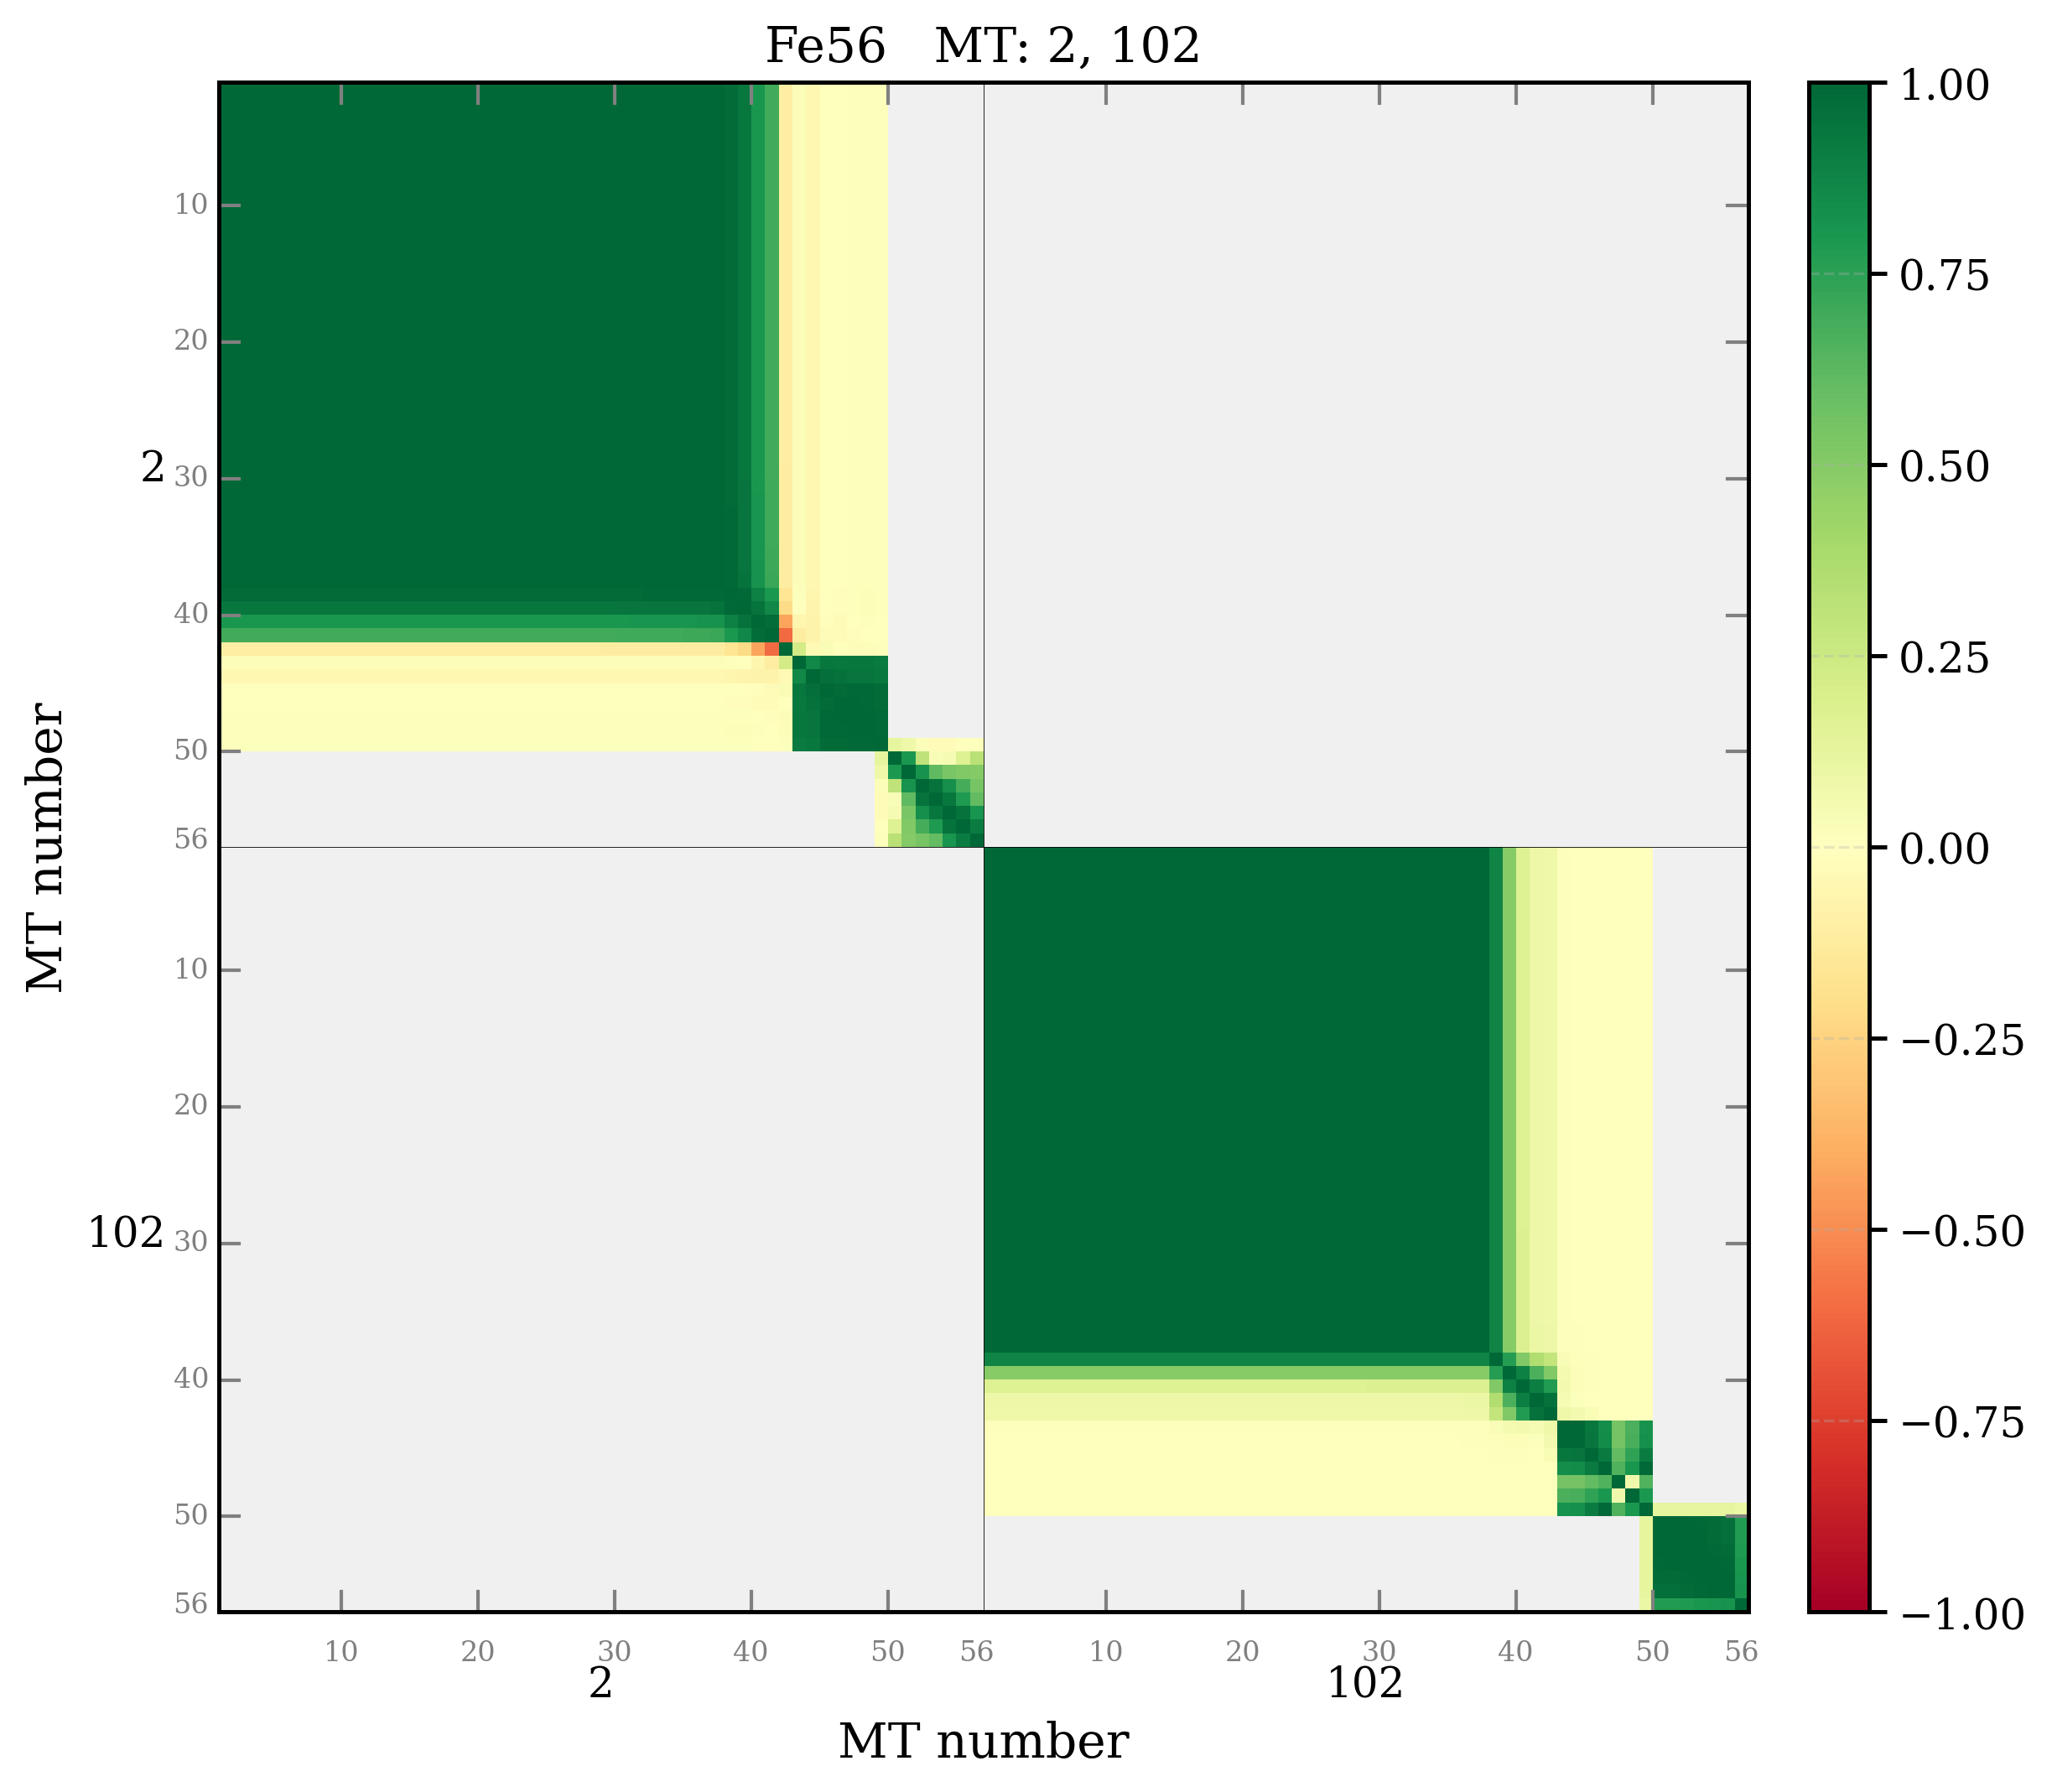

In [9]:
# Heatmap for multiple reactions (shows diagonal blocks)
covmat.plot_covariance_heatmap(zaid=26056, mt=[2, 102], show_uncertainties=False, figsize=(8, 8))
plt.show()

## Example 4: Get Uncertainty Values

Use the `get_uncertainty` method to retrieve uncertainty values programmatically.

In [11]:
# Get uncertainty array for a reaction across all energy groups
uncertainties = covmat.get_uncertainty(zaid=26056, mt=102)
print(f"Uncertainty array shape: {uncertainties.shape}")
print(f"Mean uncertainty: {uncertainties.mean():.4f}")
print(f"Max uncertainty: {uncertainties.max():.4f}")
print(f"Min uncertainty: {uncertainties.min():.4f}")

Uncertainty array shape: (56,)
Mean uncertainty: 0.0985
Max uncertainty: 0.4410
Min uncertainty: 0.0236


## Summary

The `CovMat` class provides three main plotting methods:

1. **`plot_uncertainties(zaid, mt, ...)`** - Plots relative uncertainties vs. energy
   - Single or multiple reactions
   - Useful for comparing uncertainty profiles

2. **`plot_multigroup_xs(zaid, mt, show_uncertainties=True/False, ...)`** - Plots cross-section values
   - With optional uncertainty bands (shaded regions)
   - Good for visualizing actual XS data with error bars

3. **`plot_covariance_heatmap(zaid, mt, ...)`** - Visualizes covariance matrix structure
   - `mt=int` → single diagonal block
   - `mt=[int, int, ...]` → multiple diagonal blocks
   - `mt=(int, int)` → off-diagonal cross-covariance block

All methods support customization via style, figsize, dpi, energy_range, etc.